In [47]:
from miditok import REMI, TokenizerConfig
from miditok.pytorch_data import DatasetTok, DataCollator
from pathlib import Path
from symusic import Score
import tokenizers
from matplotlib import pyplot as plt
import glob

In [74]:
## MAKING TOKENIZER 
config = TokenizerConfig(num_velocities=16, use_chords=True, use_programs=True)
tokenizer = REMI(config)

# midi = Score("../data/test/3.mid") # symusic datatype to store midi files
midi = Score("../data/test/AFINE-1.mid") # symusic datatype to store midi files
tokens = tokenizer(midi) # converted into tokens 
midi_from_tokens = tokenizer(tokens) # from tokens back to midi
tokens2 = tokenizer(midi_from_tokens) # another loop to check if data stays same
midi_from_tokens2 = tokenizer(tokens2)

print(midi.__eq__(midi_from_tokens)) # False ??? 
print(midi_from_tokens.__eq__(midi_from_tokens2)) # True
print(midi.ttype == midi_from_tokens.ttype) # True
print(tokens.__eq__(tokens2)) # True for 3.mid, False for afine-1.mid

False
True
True
False


In [75]:
print(type(tokens))
print(len(tokens.tokens),tokens.tokens[8])
print(len(tokens.events),tokens.events[8]) 
print(len(tokens.ids),tokens.ids[8])
# print(len(tokens.bytes),tokens.bytes[1]) # only exists after bpe is applied

<class 'miditok.classes.TokSequence'>
7626 Pitch_65
7626 Pitch_65
7626 49


In [76]:
### training tokenizers/ doing encoding with BPE 
### then maybe saving it ???
midi_files = list(Path("..\\data\\test\\").glob("**/*.mid"))
files = glob.glob("..\\data\\test\\*.mid")
print(files)
print(midi_files)

dataset = DatasetTok(
    files_paths=midi_files,
    min_seq_len=100,
    max_seq_len=1024,
    tokenizer=tokenizer
)

collator = DataCollator(
    tokenizer["PAD_None"], tokenizer["BOS_None"], tokenizer["EOS_None"]
)


['..\\data\\test\\3.mid', '..\\data\\test\\afine-1.MID']
[WindowsPath('../data/test/3.mid'), WindowsPath('../data/test/afine-1.MID')]


Loading data: ..\data\test: 100%|██████████| 2/2 [00:00<00:00, 45.71it/s]


In [77]:
from torch.utils.data import DataLoader
data_loader = DataLoader(dataset=dataset, collate_fn=collator)


for batch in data_loader:
    print(batch)

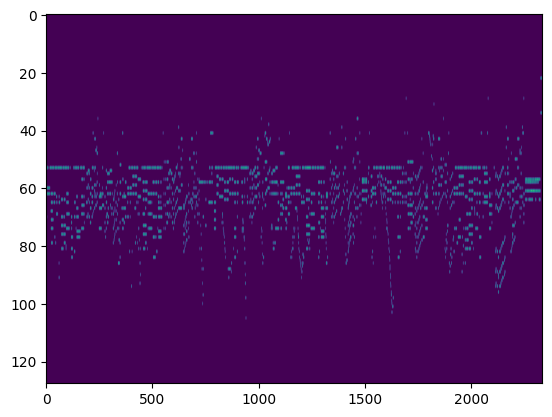

In [44]:
s = midi_from_tokens.resample(tpq=6, min_dur=1)
track = s.tracks[0]
pianoroll = track.pianoroll(modes=["onset", "frame"], pitch_range=[0, 128], encode_velocity=False)
# this will show the onset and frame of the piano roll in one figure
plt.imshow(pianoroll[0] + pianoroll[1], aspect="auto")
plt.show()